In [32]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scorecardpy as sc

c:\Users\Aperalesc\AppData\Local\Programs\Python\Python310\lib\site-packages\scorecardpy\germancredit.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
df = pd.read_excel("dashboards_csc - logit.xlsx")
df.head()

,Gerencia,Dashboard,Descripcion,Usuario,Usuarios,Usuarios Activos,% Usuarios Activos,Promedio Mensual de Vistas,Frecuencia,Link,...,nombre_workspace,ID_PowerBIViewer,enero,febrero,marzo,abril,mayo,junio,julio,es_activo
0,PTP,CSC_PTP Gestión del Proceso OC-OS TI,Dashboard que da visibilidad a los usuarios in...,Liseth Villavicencio,141,51,0.36,143,Diaria,https://bi.alicorp.com.pe/reports/508,...,CSC_PTP_Workspace,508,51.0,71.0,174.0,161.0,115.0,243,113,1
1,ADM,CSC_SLA_Administración,Dashboard indicadores procesos y Productividad,NaN,15,10,0.67,37,Mensual,https://bi.alicorp.com.pe/reports/556,...,CSC KPIs SLA Indicadores,556,29.0,8.0,54.0,33.0,89.0,69,33,1
2,ADM,CSC_ADM_Servicio de Taxis,Dashboard que brinda detalles del servicio y g...,NaN,338,75,0.22,26,Mensual,https://bi.alicorp.com.pe/reports/437,...,CSC_ADM_Workpace,437,41.0,85.0,37.0,14.0,32.0,31,5,1
3,PTP,CSC_PTP Control de Liquidación de Transportes,Dashboard que da visibilidad a los usuarios in...,Marco Oyola,39,20,0.51,43,Mensual,https://bi.alicorp.com.pe/reports/530,...,CSC_PTP_Workspace,530,87.0,24.0,35.0,23.0,18.0,40,13,1
4,PTP,CSC_PTP_Dashboard Homologación de Proveedores,Dashboard donde se mostrarán el status de homo...,Erick Pachas,388,60,0.15,30,Diaria,https://bi.alicorp.com.pe/reports/669,...,CSC_PTP_Workspace,669,6.0,36.0,36.0,17.0,7.0,20,86,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gerencia                    58 non-null     object 
 1   Dashboard                   58 non-null     object 
 2   Descripcion                 54 non-null     object 
 3   Usuario                     52 non-null     object 
 4   Usuarios                    58 non-null     int64  
 5   Usuarios Activos            58 non-null     int64  
 6   % Usuarios Activos          58 non-null     float64
 7   Promedio Mensual de Vistas  58 non-null     int64  
 8   Frecuencia                  58 non-null     object 
 9   Link                        58 non-null     object 
 10  Estado_Publicacion          58 non-null     object 
 11  Es_Chapter                  58 non-null     int64  
 12  Fuente_Archivos_Sharepoint  58 non-null     int64  
 13  Fuente_BigQuery             58 non-nu

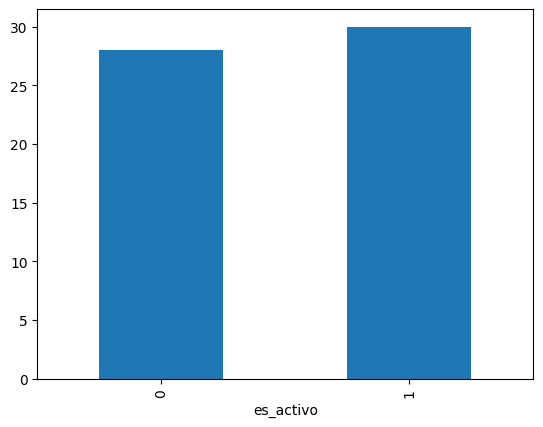

In [ ]:
df.groupby(['es_activo']).size().plot(kind='bar')
plt.show()

In [19]:
df['Frecuencia'].unique()

array(['Diaria', 'Mensual', 'Semanal', 'A demanda'], dtype=object)

In [16]:
frecuencias = ['Mensual','Diaria','Semanal','Anual','Trimestral','Semestral','A demanda']

In [17]:
for freq in frecuencias:
    df[f'Frecuencia_{freq}'] = np.where(df['Frecuencia']==freq,1,0)    

In [18]:
df.head()

,Gerencia,Dashboard,Descripcion,Usuario,Usuarios,Usuarios Activos,% Usuarios Activos,Promedio Mensual de Vistas,Frecuencia,Link,...,junio,julio,es_activo,Frecuencia_Mensual,Frecuencia_Diaria,Frecuencia_Semanal,Frecuencia_Anual,Frecuencia_Trimestral,Frecuencia_Semestral,Frecuencia_A demanda
0,PTP,CSC_PTP Gestión del Proceso OC-OS TI,Dashboard que da visibilidad a los usuarios in...,Liseth Villavicencio,141,51,0.36,143,Diaria,https://bi.alicorp.com.pe/reports/508,...,243,113,1,0,1,0,0,0,0,0
1,ADM,CSC_SLA_Administración,Dashboard indicadores procesos y Productividad,NaN,15,10,0.67,37,Mensual,https://bi.alicorp.com.pe/reports/556,...,69,33,1,1,0,0,0,0,0,0
2,ADM,CSC_ADM_Servicio de Taxis,Dashboard que brinda detalles del servicio y g...,NaN,338,75,0.22,26,Mensual,https://bi.alicorp.com.pe/reports/437,...,31,5,1,1,0,0,0,0,0,0
3,PTP,CSC_PTP Control de Liquidación de Transportes,Dashboard que da visibilidad a los usuarios in...,Marco Oyola,39,20,0.51,43,Mensual,https://bi.alicorp.com.pe/reports/530,...,40,13,1,1,0,0,0,0,0,0
4,PTP,CSC_PTP_Dashboard Homologación de Proveedores,Dashboard donde se mostrarán el status de homo...,Erick Pachas,388,60,0.15,30,Diaria,https://bi.alicorp.com.pe/reports/669,...,20,86,1,0,1,0,0,0,0,0


In [34]:
def calcular_iv(col,df=df,target='es_activo',lista_cat=None,generar_col=False):

    """
    Calcula el IV de una columna.
    
    Args:
        col (str): Columna a evaluar.
        df (DataFrame): DataFrame que contiene la columna y el target.
        target (str): Nombre de la columna objetivo.
        lista_cat (dict): Opcional. Son bins personalizados que permiten haer una mejor categorización de los datos, si es que los valores por defecto no son satisfactorios

    """

    if lista_cat is None:
        bins = sc.woebin(df[[col, target]], y=target)
    else:
        bins = sc.woebin(df[[col, target]], y=target, breaks_list={col: lista_cat})
        
    print(bins[col])
    iv = bins[col]['total_iv'].iloc[0]
    print(f"\nIV de la columna {col}: {iv}")

    #i_values[col] = iv

    #if generar_col:
    #    # Usar woebin_ply para asignar los bins a una nueva columna en el DataFrame
    #    df[f'{col}_bin'] = sc.woebin_ply(bins, df[[col]])
    
    # Graficar los bins
    plt.figure(figsize=(16,6))
    sc.woebin_plot(bins[col])
    plt.show()

[INFO] creating woe binning ...
     variable                  bin  count  count_distr  good  bad   badprob  \
0  Frecuencia  A demanda%,%Semanal      6     0.103448     4    2  0.333333   
1  Frecuencia              Mensual     42     0.724138    20   22  0.523810   
2  Frecuencia               Diaria     10     0.172414     4    6  0.600000   

        woe    bin_iv  total_iv               breaks  is_special_values  
0 -0.762140  0.058068  0.077796  A demanda%,%Semanal              False  
1  0.026317  0.000501  0.077796              Mensual              False  
2  0.336472  0.019227  0.077796               Diaria              False  

IV de la columna Frecuencia: 0.07779608050225903


c:\Users\Aperalesc\AppData\Local\Programs\Python\Python310\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\Aperalesc\AppData\Local\Programs\Python\Python310\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\Aperalesc\AppData\Local\Programs\Python\Python310\lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could 

<Figure size 1600x600 with 0 Axes>

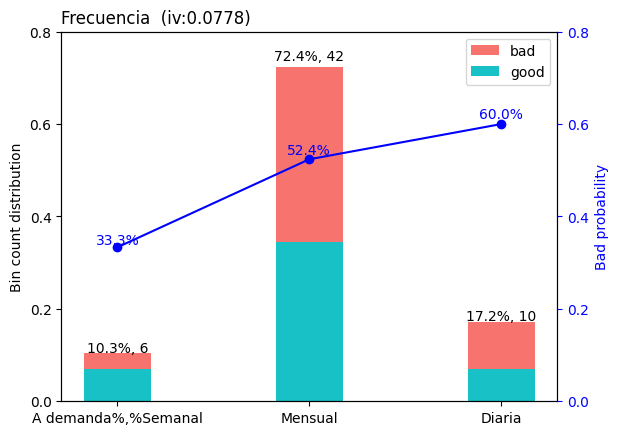

In [35]:
calcular_iv('Frecuencia')

In [20]:
df.columns

Index(['Gerencia', 'Dashboard', 'Descripcion', 'Usuario', 'Usuarios',
       'Usuarios Activos', '% Usuarios Activos', 'Promedio Mensual de Vistas',
       'Frecuencia', 'Link', 'Estado_Publicacion', 'Es_Chapter',
       'Fuente_Archivos_Sharepoint', 'Fuente_BigQuery',
       'Fuente_ListaSharepoint', 'Fuente_PostgreSQL', 'Audiencia',
       'GerenciaResponsable', 'nombre_workspace', 'ID_PowerBIViewer', 'enero',
       'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'es_activo',
       'Frecuencia_Mensual', 'Frecuencia_Diaria', 'Frecuencia_Semanal',
       'Frecuencia_Anual', 'Frecuencia_Trimestral', 'Frecuencia_Semestral',
       'Frecuencia_A demanda'],
      dtype='object')

In [27]:
cols_corr = ['es_activo','Usuarios','Frecuencia_Mensual','Frecuencia_Diaria', 'Frecuencia_Semanal',
       'Frecuencia_Anual', 'Frecuencia_Trimestral', 'Frecuencia_Semestral',
       'Frecuencia_A demanda','Fuente_Archivos_Sharepoint', 'Fuente_BigQuery',
       'Fuente_ListaSharepoint', 'Fuente_PostgreSQL']

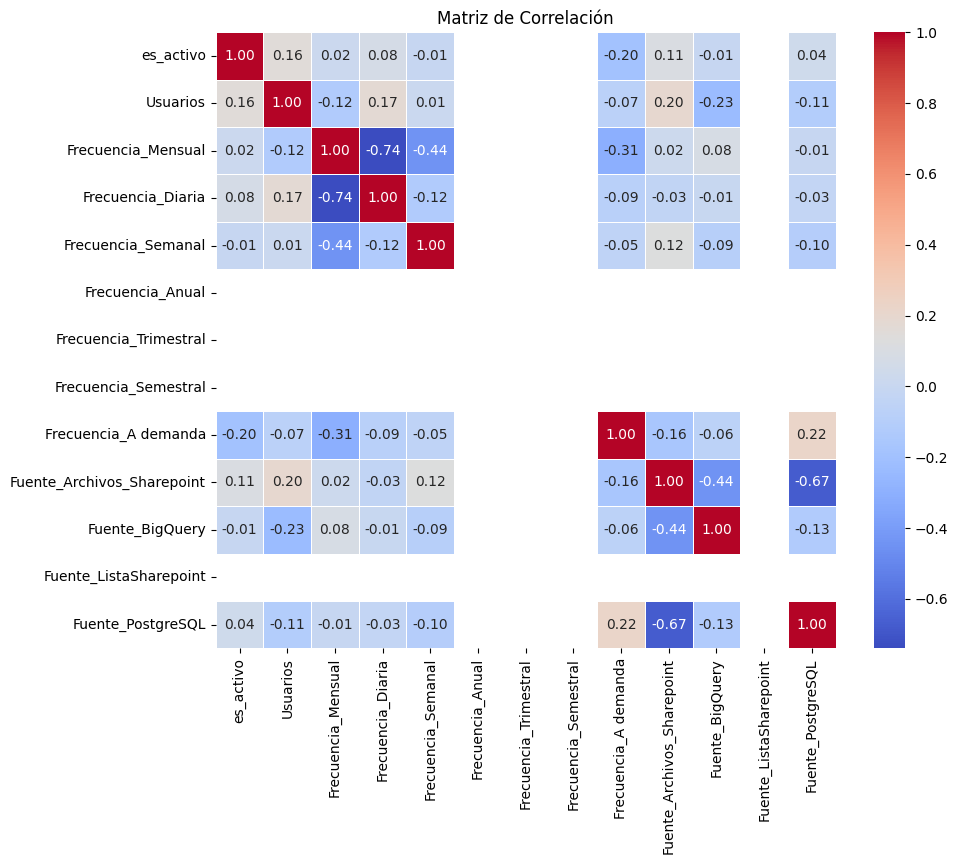

In [31]:
# Calcular la matriz de correlación
df_corr = df[cols_corr]

# Crear una máscara para ocultar los valores NaN
mask = df_corr.corr().isnull()

# Crear el heatmap con la máscara
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', mask=mask, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [7]:
df.columns

Index(['Gerencia', 'Dashboard', 'Descripcion', 'Usuario', 'Usuarios',
       'Usuarios Activos', '% Usuarios Activos', 'Promedio Mensual de Vistas',
       'Frecuencia', 'Link', 'Estado_Publicacion', 'Es_Chapter',
       'Fuente_Archivos_Sharepoint', 'Fuente_BigQuery',
       'Fuente_ListaSharepoint', 'Fuente_PostgreSQL', 'Audiencia',
       'GerenciaResponsable', 'nombre_workspace', 'ID_PowerBIViewer', 'enero',
       'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'es_activo'],
      dtype='object')

In [ ]:
cols = ['Usuarios','julio','Fuente']

In [12]:
X = df[cols]
X = sm.add_constant(X)  # Agrega el intercepto
y = df['es_activo']

modelo = sm.Logit(y, X)
resultado = modelo.fit()

print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.511708
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              es_activo   No. Observations:                   58
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                            2
Date:                Tue, 29 Jul 2025   Pseudo R-squ.:                  0.2611
Time:                        18:09:11   Log-Likelihood:                -29.679
converged:                       True   LL-Null:                       -40.168
Covariance Type:            nonrobust   LLR p-value:                 2.784e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9492      0.456     -2.083      0.037      -1.842      -0.056
Usuarios      -0.0008      0.